In [1]:
# Dependencies and Setup
# render the figure in a notebook instead of displaying a dump of the figure object.
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
#from matplotlib.pyplot import figure
#from matplotlib.pyplot import gcf
import seaborn as sns
sns.set()

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#mouse data : Mouse ID	Drug
mouseData_df= pd.read_csv("data/mouse_drug_data.csv")
#trial data: Mouse ID	Timepoint	Tumor Volume (mm3)	Metastatic Sites
trialData_df= pd.read_csv("data/clinicaltrial_data.csv")

In [2]:
allData_df=pd.merge(mouseData_df,trialData_df, on=["Mouse ID","Mouse ID"])
allDataGroupedDT=allData_df.groupby(['Drug','Timepoint'])

In [3]:
### TUMOR VOLUME ###
aggTVdf=allDataGroupedDT['Tumor Volume (mm3)'].agg([np.mean, sem]).reset_index()
aggTVdf.head()

,Drug,Timepoint,mean,sem
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


In [4]:
#get pivtot table with mean values
# see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html 
tmeandf=aggTVdf.drop(columns=['sem']).set_index('Timepoint')
pivotedMeanTVdf=tmeandf.pivot(columns='Drug', values='mean')
pivotedMeanTVdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#get pivtot table with standard error values
tsemdf=aggTVdf.drop(columns=['mean']).set_index('Timepoint')
pivotedSemTVdf=tsemdf.pivot(columns='Drug', values='sem')
pivotedSemTVdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


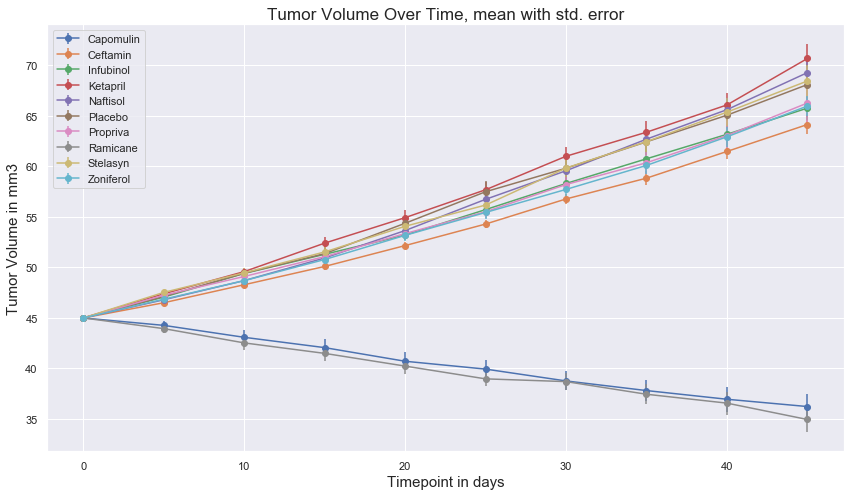

In [6]:
# see https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-errorbars
fig, ax = plt.subplots(1,1)  #wrapper, ax : axes.Axes object or array of Axes objects.
pivotedMeanTVdf.plot(yerr=pivotedSemTVdf, ax=ax, marker ='o', grid=True, figsize=(12, 7))
# see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels=aggTVdf['Drug'].unique(), loc="best", frameon="False")
ax.set_xlabel('Timepoint in days', fontsize=15)
ax.set_ylabel('Tumor Volume in mm3', fontsize=15)
ax.set_title('Tumor Volume Over Time, mean with std. error', fontsize=17)
plt.tight_layout()
plt.savefig("Images/MeanTumorVolume.png")
plt.show()

In [7]:
### METASTATIC RESPONSE ###
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_df=allData_df[["Drug", "Timepoint", "Metastatic Sites"]]
aggMTdf= Metastatic_df.groupby(["Drug", "Timepoint"])


In [8]:
#mean values
groupedMTMean= pd.DataFrame(aggMTdf.mean()).reset_index()
groupedMTMean.head()
#sem values
groupedMTSE= pd.DataFrame(aggMTdf.sem()).reset_index()
groupedMTSE.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
pivotedMeanMTdf=groupedMTMean.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivotedMeanMTdf
pivotedSemMTdf=groupedMTSE.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivotedSemMTdf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


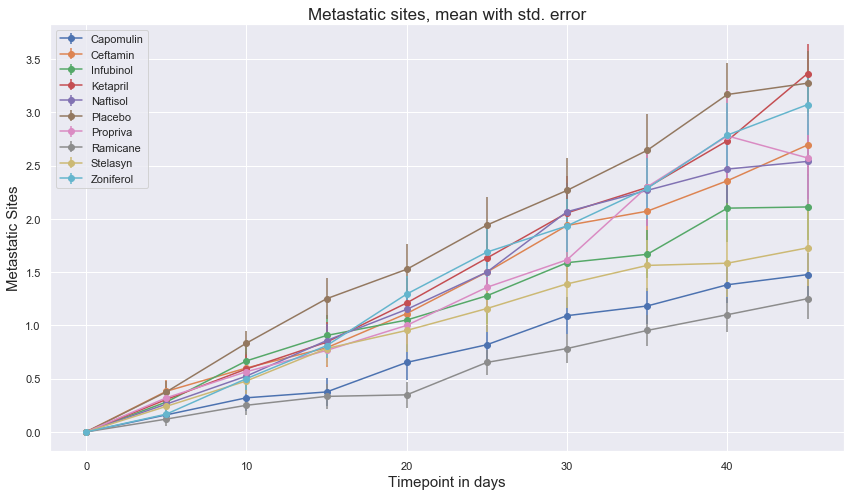

In [10]:
Fig, ax = plt.subplots(1,1) 
pivotedMeanMTdf.plot(yerr=pivotedSemMTdf, ax=ax, marker ='o', grid=True, figsize=(12, 7))
ax.legend(labels=aggTVdf['Drug'].unique(), loc="best", frameon="False")
ax.set_xlabel('Timepoint in days', fontsize=15)
ax.set_ylabel('Metastatic Sites', fontsize=15)
ax.set_title('Metastatic sites, mean with std. error', fontsize=17)
plt.tight_layout()
plt.savefig("Images/MetastaticSites.png")
plt.show()

In [11]:
### SURVIVAL RATES ###
#Mice Grouped by Drug and Timepoint
micedf=allData_df[["Drug", "Timepoint", "Mouse ID"]]
micegrp=micedf.groupby(["Drug", "Timepoint"])
micecount=pd.DataFrame(micegrp.count()).reset_index()  # get number of mice at timepoint
micecount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
pmicecount = micecount.pivot_table(index="Timepoint", columns="Drug")
pPmiceCount = pmicecount / pmicecount.iloc[0, :] * 100  # percentage of mice remaining
pPmiceCount

Mouse ID                                                           \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo    Propriva   
Timepoint                                                                      
0             100.0    100.0     100.0    100.0    100.0   100.0  100.000000   
5             100.0     84.0     100.0     92.0     92.0    96.0   96.153846   
10            100.0     80.0      84.0     88.0     84.0    96.0   88.461538   
15             96.0     76.0      84.0     76.0     84.0    80.0   65.384615   
20             92.0     72.0      80.0     76.0     80.0    76.0   65.384615   
25             88.0     72.0      72.0     76.0     72.0    68.0   53.846154   
30             88.0     64.0      68.0     72.0     60.0    60.0   50.000000   
35             88.0     56.0      48.0     68.0     60.0    56.0   38.461538   
40             84.0     56.0      40.0     60.0     60.0    48.0   34.615385   
45             84.0     52.0      36.0     44.0     52.0    44.0   26.923077   

                                          
Drug      Ramicane    Stelasyn Zoniferol  
Timepoint                                 
0            100.0  100.000000     100.0  
5            100.0   96.153846      96.0  
10            96.0   88.461538      88.0  
15            96.0   88.461538      84.0  
20            92.0   80.769231      68.0  
25            92.0   73.076923      64.0  
30            92.0   69.230769      60.0  
35            84.0   61.538462      56.0  
40            80.0   46.153846      56.0  
45            80.0   42.307692      56.0

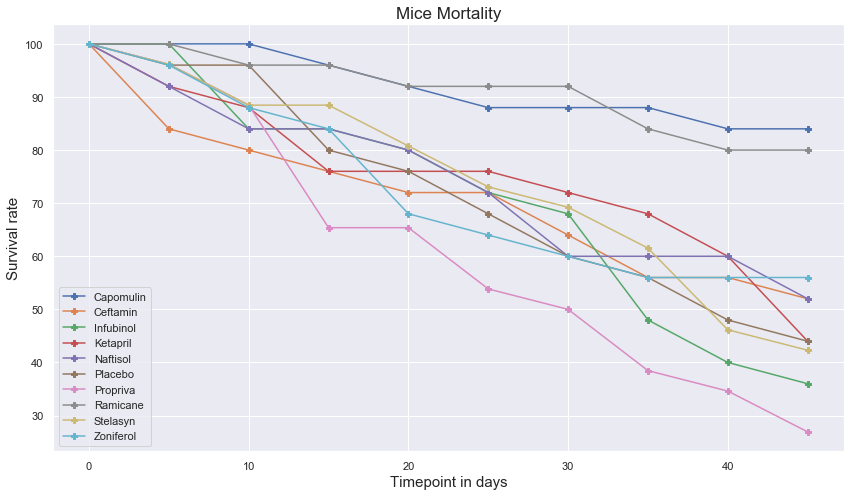

In [13]:
# plot mice mortality

Fig, ax = plt.subplots(1,1) 
pPmiceCount.plot( ax=ax, marker ='P', grid=True, figsize=(12, 7))
ax.legend(labels=aggTVdf['Drug'].unique(), loc="best", frameon="False")
ax.set_xlabel('Timepoint in days', fontsize=15)
ax.set_ylabel('Survival rate', fontsize=15)
ax.set_title('Mice Mortality', fontsize=17)
plt.tight_layout()
plt.savefig("Images/MiceMortaliy.png")
plt.show()

In [14]:


### % TUMOR VOLUME CHANGE PER DRUG ###
# change : max mean tumor volume - min mean tumor volume  
# negative number is reduction, positive is increment
change= ( pivotedMeanTVdf.iloc[9,:] - pivotedMeanTVdf.iloc[0,:]) 
sortedchange=change.sort_values()
ranged=[sortedchange.max(),sortedchange.min()]
barcount=len(sortedchange)
ind = np.arange(barcount)  # the x locations for the groups  0-9
width = 0.85       # the width of the bars
colors=[]
for abar in ind:
    if sortedchange[abar] <=0:
        colors.append('g')
    else: 
        colors.append('r')

In [15]:
# handy label positioning  
# http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
#$ added logic to place for biothg positive and negative numbers
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        if height >0:
            label_position = height - (y_height * 0.09)
        else: 
            label_position = height + (y_height * 0.05)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,'%d' % height, ha='center', va='bottom' ,fontsize=13)


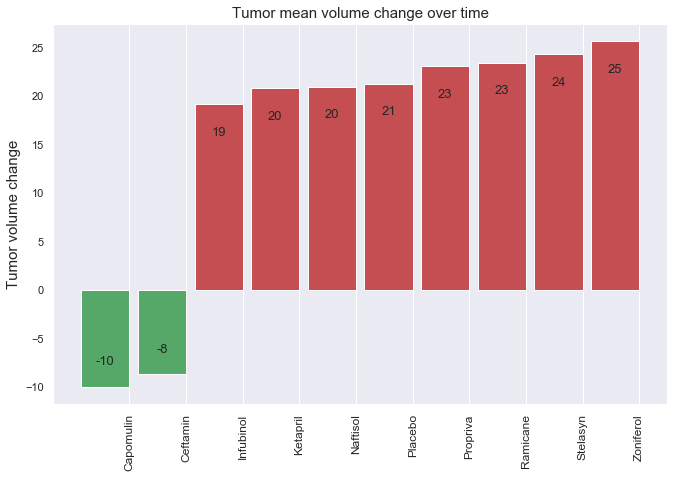

In [16]:
fig, ax = plt.subplots(figsize=(11, 7))
changeBars = ax.bar(ind, sortedchange, width, color=colors )
ax.set_ylabel('Tumor volume change', fontsize=15)
ax.set_title('Tumor mean volume change over time', fontsize=15)
ax.set_xticks(ind + width / 2)
autolabel(changeBars,ax)
ax.yaxis.grid()
ax.set_xticklabels(aggTVdf['Drug'].unique())
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Images/TumorVolChange.png")
plt.show()

## OBSERVABLE TRENDS BASED ON THE DATA :  
1 - Capomulin and Ramicane have shown to be the most effective drugs, with the greatest decrease
in mean Tumor volume and Metastatic sites, as well as the best (84 and 80% respectively) 
survival rates.


2 - Infubinol  & Propriva can be considered a high-risk drugs, while their mean tumor volume and mean metastatic sites are only slightly better than placebo, they have the lowest survival rates 
of 36% 26.9%.


3 - Ketapril increases the number of tumors and metastatic sites, and does not change the survival rate of the mice, 
 making it less effective than placebo. #.